## Caracterización

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

data = "Caracterizacion.xlsx"
data = pd.read_excel(data)
data

,Corriente (A),Campo Magnético (mT),error_corriente (A),error_campo (mT)
0,-2.88,-54.2,0.01,0.1
1,-2.77,-51.6,0.01,0.1
2,-2.67,-49.6,0.01,0.1
3,-2.56,-47.8,0.01,0.1
4,-2.48,-45.7,0.01,0.1
5,-2.37,-44.6,0.01,0.1
6,-2.27,-42.9,0.01,0.1
7,-2.18,-40.8,0.01,0.1
8,-2.07,-38.2,0.01,0.1
9,-1.96,-37.3,0.01,0.1


In [2]:
I= data['Corriente (A)']
B= data['Campo Magnético (mT)']
Ierr = data['error_corriente (A)']
Berr = data['error_campo (mT)']

w = 1/(Ierr**2)

In [3]:
sum_w = w.sum()
sum_wx = (w*I).sum()
sum_wy = (w*B).sum()
sum_wxx = (w*I**2).sum()
sum_wxy = (w*I*B).sum()

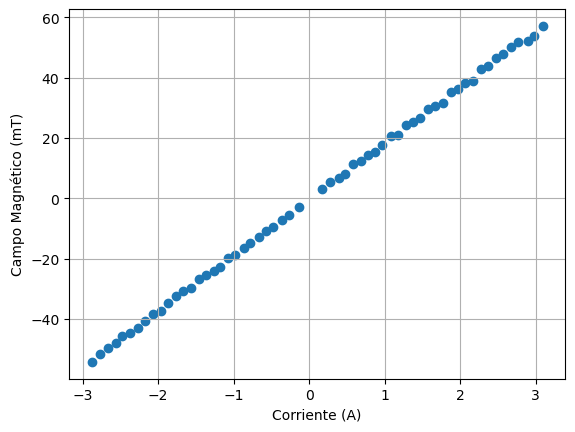

In [4]:
plt.scatter(I,B)
plt.xlabel('Corriente (A)')
plt.ylabel('Campo Magnético (mT)')
plt.grid()

In [5]:
m = (sum_w*sum_wxy - sum_wx*sum_wy) / (sum_w*sum_wxx - sum_wx**2)
b = (sum_wxx*sum_wy - sum_wx*sum_wxy) / (sum_w*sum_wxx - sum_wx**2)

m_std_err = np.sqrt(sum_w/(sum_w*sum_wxx-sum_wx**2))
b_std_err = np.sqrt(sum_wxx/(sum_w*sum_wxx-sum_wx**2))

B_model = m*I + b

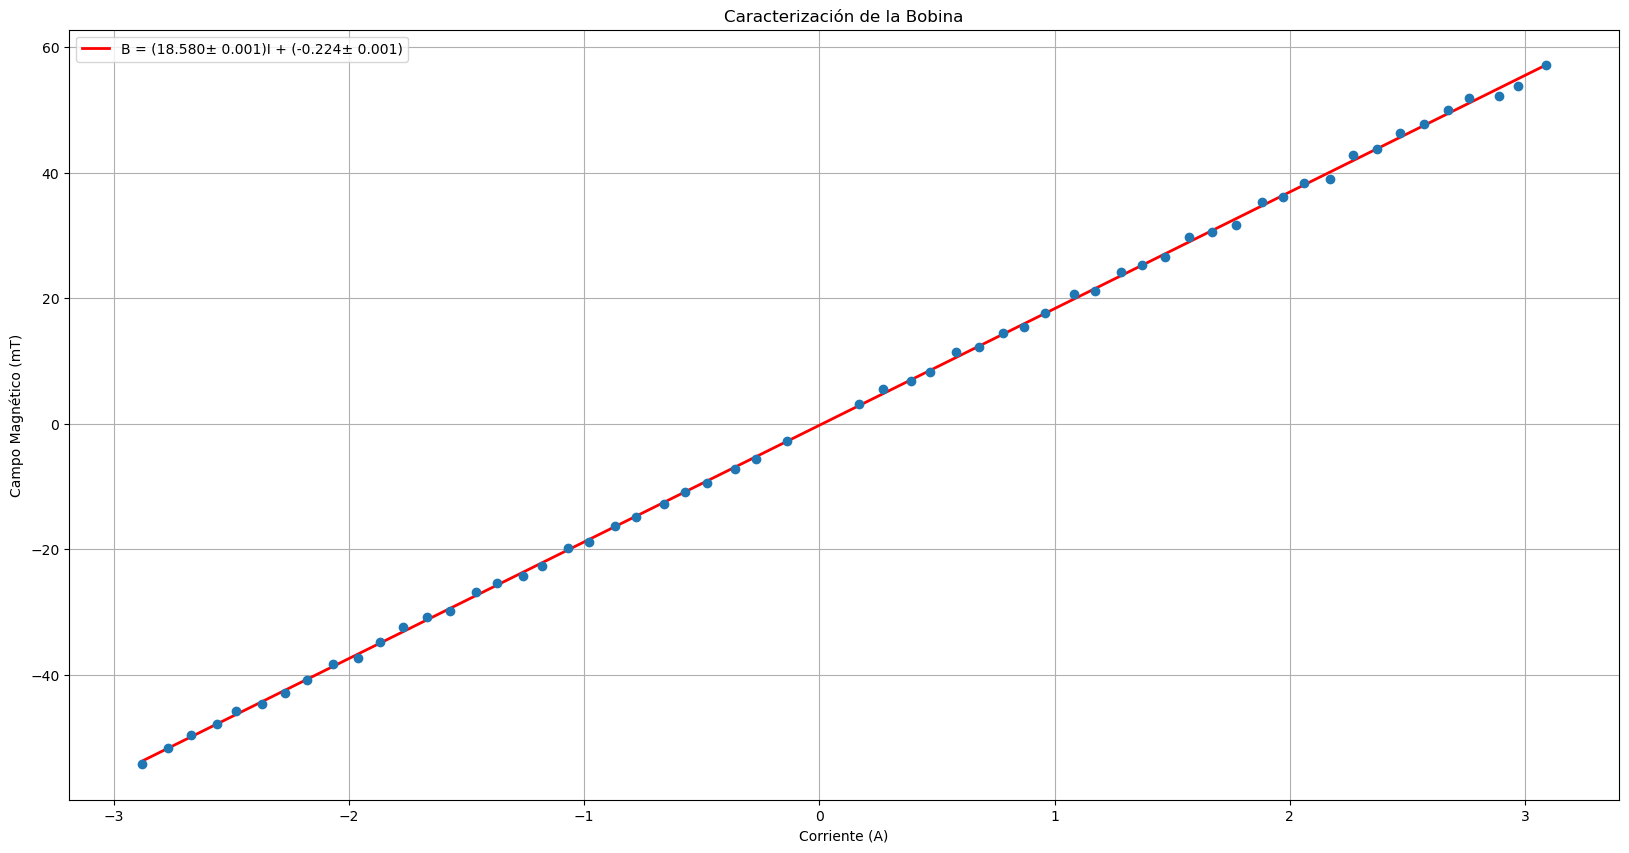

In [6]:
fig1, (ax1) = plt.subplots(1, 1, figsize=(20, 10))  # 2 rows, 1 column, width = 10 inches, height = 10 inches

ax1.plot(I,B_model, color='red', linewidth=2, label=f'B = ({m:.3f}± {m_std_err:.3f})I + ({b:.3f}± {b_std_err:.3f})')
ax1.errorbar(I, B, Berr, Ierr,  fmt='o')

ax1.set_xlabel('Corriente (A)')
ax1.set_ylabel('Campo Magnético (mT)')
ax1.legend(loc='upper left')
ax1.set_title('Caracterización de la Bobina')
ax1.grid()

plt.savefig('plot_caracterización.png', format='png')

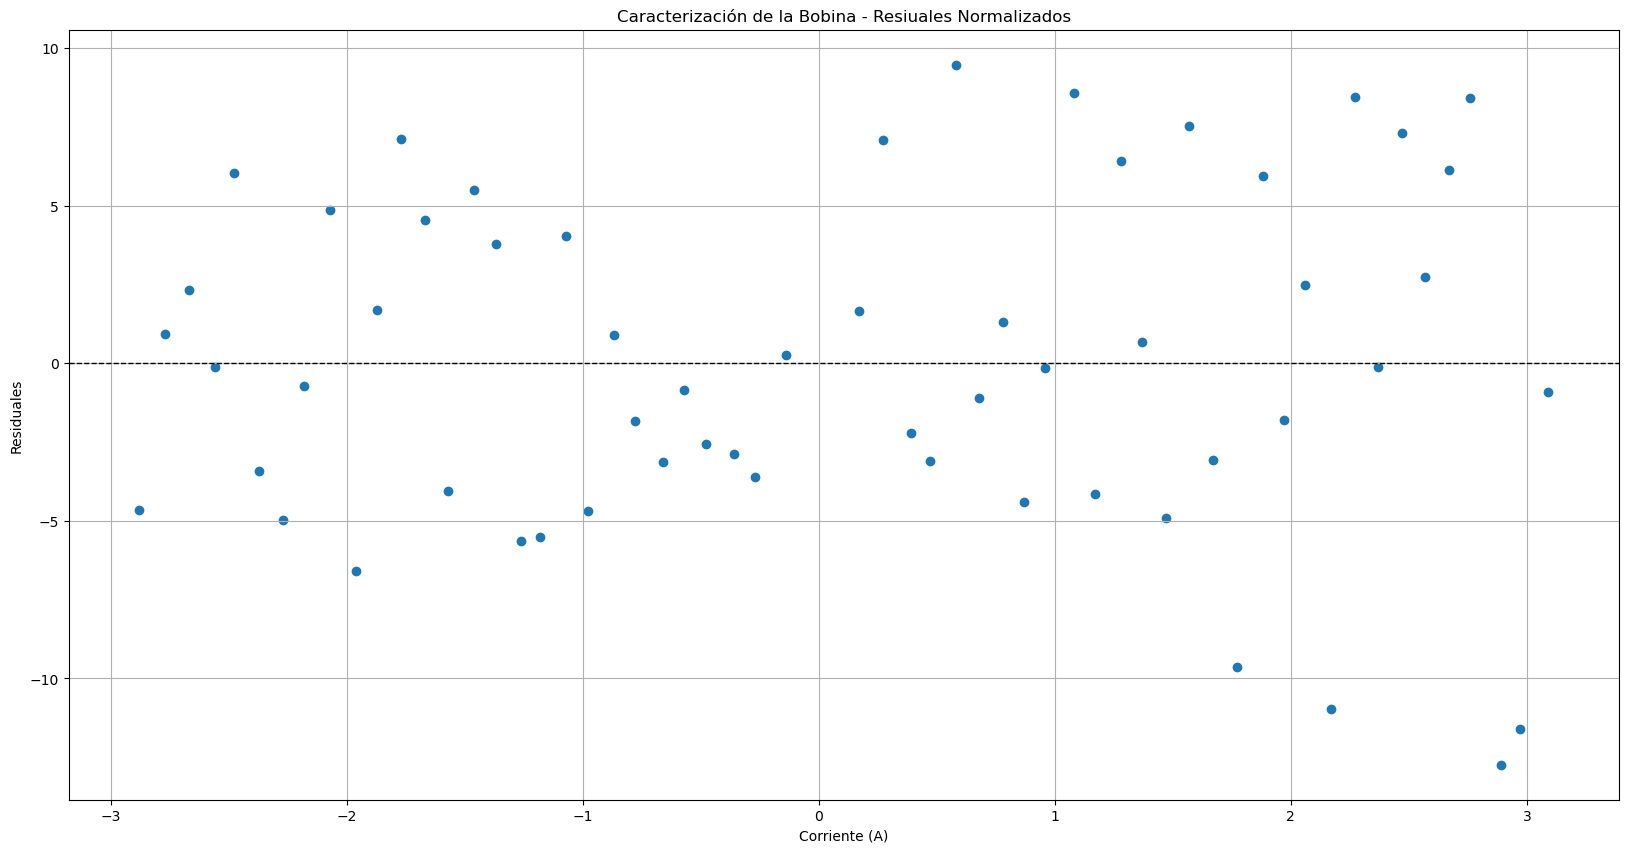

In [7]:
res = (B - B_model)/Berr

fig2, (ax2) = plt.subplots(1, 1, figsize=(20, 10))

ax2.scatter(I, res)
ax2.axhline(0, color='black', linewidth=1, linestyle='--')

ax2.set_xlabel('Corriente (A)')
ax2.set_ylabel('Residuales')
ax2.set_title('Caracterización de la Bobina - Resiuales Normalizados')
ax2.grid()

plt.savefig('residuales_caracterización.png', format='png')

In [8]:
def caracterizacion(I):
    
    return m*I + b

## Hierro

In [9]:
lamb=672e-9
l=14.25e-2
delta=lambda N: N*lamb/2

In [10]:
I_Fe=np.array([0.14,1.18,2.55])
Conteo_Fe=np.array([0,1,0])

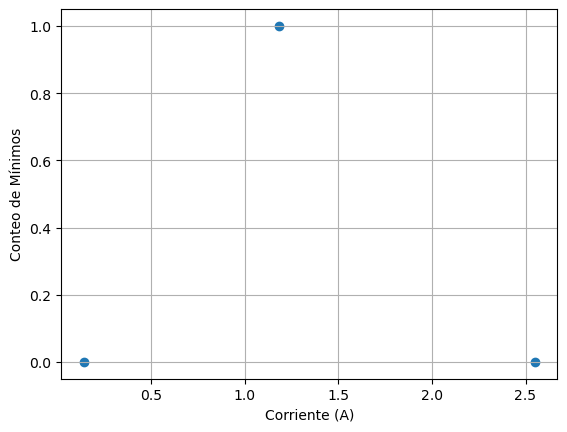

In [11]:
plt.scatter(I_Fe,Conteo_Fe)
plt.xlabel('Corriente (A)')
plt.ylabel('Conteo de Mínimos')
plt.grid()

In [12]:
B_Fe = caracterizacion(I_Fe)
Long_Fe=delta(Conteo_Fe)/l

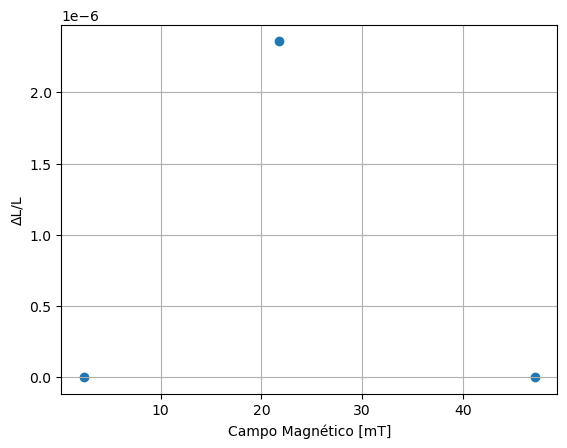

In [13]:
plt.scatter(B_Fe,Long_Fe)
plt.xlabel('Campo Magnético [mT]')
plt.ylabel('ΔL/L')
plt.grid()


plt.savefig('plot_hierro.png', format='png')

## Niquel

In [14]:
I_Ni=np.array([-3.22,-2.18,-1.72,-1.08,-0.74,-0.49,-0.36,-0.26,-0.14,0.14,0.21,0.28,0.38,0.5,0.7,0.95,1.48,2.77])
Conteo_Ni=np.array([8,7,6,5,4,3,2,1,0,0,1,2,3,4,5,6,7,8])

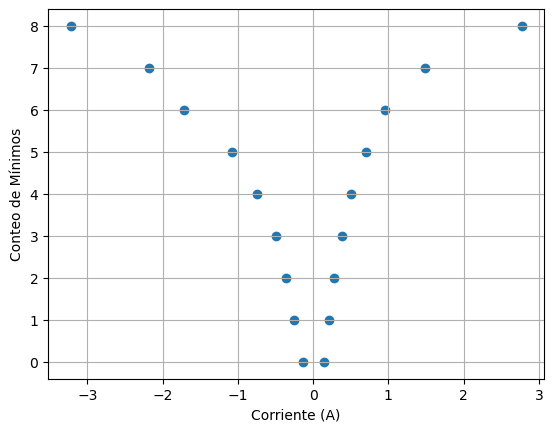

In [15]:
plt.scatter(I_Ni,Conteo_Ni)
plt.xlabel('Corriente (A)')
plt.ylabel('Conteo de Mínimos')
plt.grid()

In [16]:
B_Ni=caracterizacion(I_Ni)
Long_Ni=delta(Conteo_Ni)/l

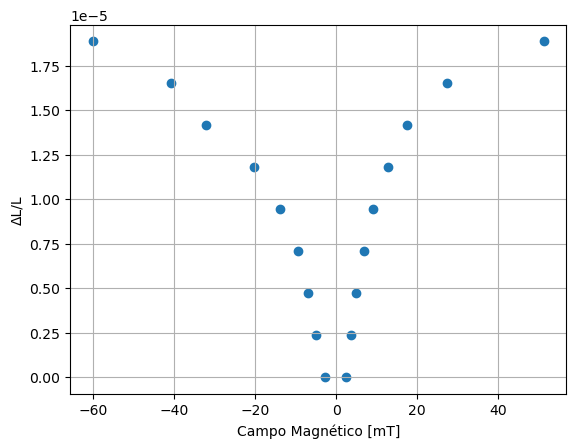

In [17]:
plt.scatter(B_Ni,Long_Ni)
plt.xlabel('Campo Magnético [mT]')
plt.ylabel('ΔL/L')
plt.grid()

plt.savefig('plot_niquel.png', format='png')